In [32]:
#импорт библиотек
import pandas as pd
import numpy as np
import random

#визуализация
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
#загружаем данные
hr = pd.read_csv( 'HR_comma_sep.csv' )

In [45]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Параметры:
- satisfaction_level -  уровень удовлетворенности (от 0 до 1),
- latest_evaluation - последняя оценка (ежегодно, от 0 до 1),
- number_project - количество проработанных/закрытых проектов (натуральное число),
- average_monthly_hours - среднее количество часов в месяц (натуральное число),
- time_spend_company - время, проведенное в компании (в годах, натуральное число),
- work_accident - несчастный случай на работе (в течение последних 2 лет, логическое),
- promotion_last_5years - продвижение по службе за последние 5 лет (количество раз, логическое),
- department - отдел (из списка),
- salary - зарплата (низкая, средняя, большая).

In [35]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Всего в датасете 14999 строк. Пропусков нет.

In [36]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Выбросов и шумов пока не вижу. work_accident, left, promotion_last_5years, sales, salary категориальные, посмотрим для них отдельно.

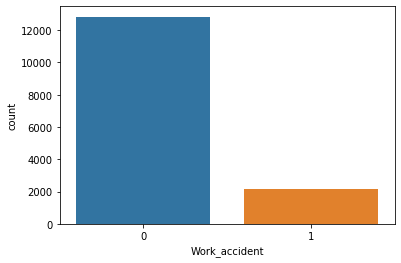

In [37]:
sns.countplot("Work_accident", data=hr)

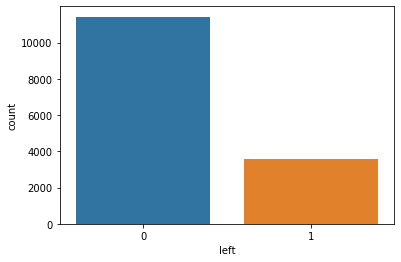

In [38]:
sns.countplot("left", data=hr)

Данные не сбалансированы, намного больше сотрудников остались в компании.

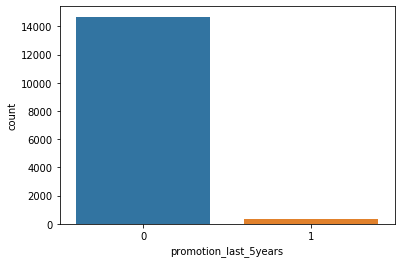

In [39]:
sns.countplot("promotion_last_5years", data=hr)

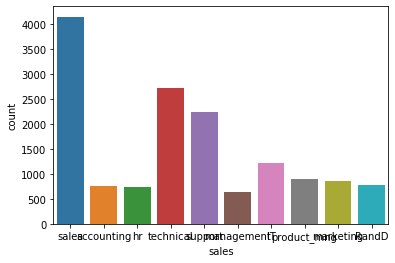

In [40]:
sns.countplot("sales", data=hr)

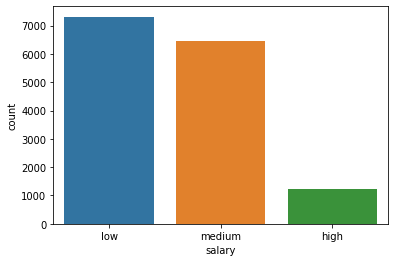

In [41]:
sns.countplot("salary", data=hr)

Явных выбросов и шумов нет.

In [70]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [90]:
#избавляемся от категориальных признаков
hr.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [91]:
hr.sales=label_encoder.fit_transform(hr.sales)

In [92]:
hr.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [93]:
hr.salary=label_encoder.fit_transform(hr.salary)

In [94]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [98]:
#удалим итоговый столбец
y=hr['left']
y.unique()
X=hr.drop(['left'],axis=1)

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=15000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=15000)

In [101]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [102]:
model.score(X_test,y_test)

0.7654545454545455

In [ ]:
#посмотрим другие модели 
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

models = [('KNN', KNeighborsClassifier(n_neighbors=3)), 
         ('GaussianNB', GaussianNB()),
         ('LinearSVC', LinearSVC(tol=1e-5))]

for name, clf in models:
    print("%s: train score: %.3f" % (name, cross_val_score(clf, X_train, y_train, cv=5).mean()))
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Test performance: %.3f" % (1-mean_squared_error(y_pred, y_test)))

In [111]:
import xgboost as xgb
clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=8)
print("%s: train score: %.3f" % ('XGB', cross_val_score(clf, X_train, y_train, cv=5).mean()))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Test performance: %.3f" % (1-mean_squared_error(y_pred, y_test)))

XGB: train score: 0.982
Test performance: 0.983


Лучший результат дал алгоритм XGBoost, 98,3%